## Initial loading of libraries and dataset

In [1]:
# Connect the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
# Load Yelp Dataset
data = tfds.load("yelp_polarity_reviews")
train_data = data["train"]
test_data = data["test"]

In [3]:
# Convert data to lists
train, test = [], []
for dataPoint in data["train"]:
    train.append(dataPoint)
for dataPoint in data["test"]:
    test.append(dataPoint)

In [4]:
# Separate texts and labels for training data
trainX, trainY = [], []
for dataPoint in train:
    trainX.append(dataPoint["text"].numpy().decode())
    trainY.append(int(dataPoint["label"].numpy()))

In [5]:
# Separate texts and labels for test data
testX, testY = [], []
for dataPoint in test:
    testX.append(dataPoint["text"].numpy().decode())
    testY.append(int(dataPoint["label"].numpy()))

In [6]:
# Text tokenization
tokenizer = Tokenizer(num_words=10000)  # Maximum number of words
tokenizer.fit_on_texts(trainX)  # Train tokenizer on training data
train_sequences = tokenizer.texts_to_sequences(trainX)
test_sequences = tokenizer.texts_to_sequences(testX)

In [7]:
# Pad sequences to equal length
max_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_length)
X_test = pad_sequences(test_sequences, maxlen=max_length)

In [8]:
# Use LabelEncoder to convert labels to numbers (0 or 1)
encoder = LabelEncoder()
y_train = encoder.fit_transform(trainY)
y_test = encoder.transform(testY)

## Working with neural network

In [9]:
# Create LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification (positive/negative review)

C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 233s 27ms/step - accuracy: 0.8915 - loss: 0.2640 - val_accuracy: 0.9392 - val_loss: 0.1564
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 236s 27ms/step - accuracy: 0.9436 - loss: 0.1456 - val_accuracy: 0.9478 - val_loss: 0.1370
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 221s 25ms/step - accuracy: 0.9538 - loss: 0.1209 - val_accuracy: 0.9492 - val_loss: 0.1333
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 219s 25ms/step - accuracy: 0.9603 - loss: 0.1045 - val_accuracy: 0.9488 - val_loss: 0.1388
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 219s 25ms/step - accuracy: 0.9653 - loss: 0.0922 - val_accuracy: 0.9493 - val_loss: 0.1439


In [12]:
# Save the model
MODEL_PATH = "lstm_model.h5"
model.save(MODEL_PATH)

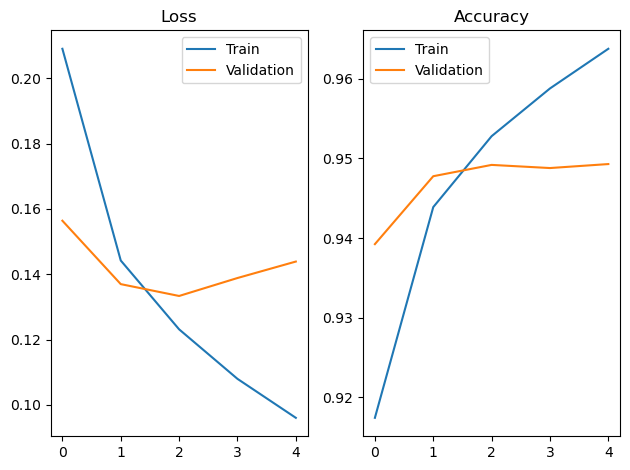

In [14]:
from matplotlib import pyplot as plt

# Loss plot
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.legend()

# Display plots
plt.tight_layout()
plt.show()

In [15]:
# Example new sentences for testing
new_sentences = [
    "This product is amazing! I love it.",
    "Worst purchase I have ever made. Very disappointed."
]

In [16]:
# Tokenize new sentences
new_sequences = tokenizer.texts_to_sequences(new_sentences)

In [17]:
# Pad sequences to equal length
new_data = pad_sequences(new_sequences, maxlen=max_length)

In [18]:
# Predict on new data
predictions = model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [20]:
# Display results
for sentence, prediction in zip(new_sentences, predictions):
    sentiment = "positive" if prediction > 0.5 else "negative"
    print(f"Sentence: {sentence}")
    print(f"Prediction: {sentiment}\n")

Sentence: This product is amazing! I love it.
Prediction: positive

Sentence: Worst purchase I have ever made. Very disappointed.
Prediction: negative

